In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
# load data
df = pd.read_csv("All_Service_Requests_-_2016.csv")
# check data
df.head()

,X,Y,SERVICEREQUESTID,STREETADDRESS,CITY,STATE,ZIPCODE,WARD,SERVICECODE,SERVICECODEDESCRIPTION,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,MARADDRESSREPOSITORYID,GLOBALID,CREATED,EDITED,OBJECTID,SE_ANNO_CAD_DATA
0,394065.60,143480.70,16-00353175,"3611 JENIFER STREET NW,WASHINGTON,DC,USA,20015",WASHINGTON,DC,20015.0,Ward 3,EMNPV,Emergency No-Parking Verification,...,394065.60,143480.70,38.959214,-77.068470,262895.0,{9A67F2A9-EDB1-22AA-E053-532F520A924B},NaN,NaN,7684176,NaN
1,397497.09,137320.60,16-00485849,"1200 - 1299 BLOCK OF L STREET NW,WASHINGTON,DC...",WASHINGTON,DC,20005.0,Ward 2,S0276,Parking Meter Repair,...,397497.09,137320.60,38.903738,-77.028856,812754.0,{9A67F2AA-383A-22AA-E053-532F520A924B},NaN,NaN,7703257,NaN
2,398316.79,141518.95,16-00485860,"4120 5TH STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,S0361,Sidewalk Repair,...,398316.79,141518.95,38.941560,-77.019416,247564.0,{9A67F2AA-383B-22AA-E053-532F520A924B},NaN,NaN,7703258,NaN
3,398729.12,137596.79,16-00485852,"1219 NEW JERSEY AVENUE NW,WASHINGTON,DC,USA,20001",WASHINGTON,DC,20001.0,Ward 6,PRUNING,Tree Pruning,...,398729.12,137596.79,38.906229,-77.014652,238344.0,{9A67F2AA-383C-22AA-E053-532F520A924B},NaN,NaN,7703259,NaN
4,399652.25,129792.78,16-00485867,"135 WILMINGTON PLACE SE,WASHINGTON,DC,USA,20032",WASHINGTON,DC,20032.0,Ward 8,S0031,Bulk Collection,...,399652.25,129792.78,38.835928,-77.004005,66302.0,{9A67F2AA-383D-22AA-E053-532F520A924B},NaN,NaN,7703260,NaN


In [160]:
# make new column for due time and actual response time (hours)
for col in ["ADDDATE", "SERVICEDUEDATE", "RESOLUTIONDATE"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df["DUE_TIME_HOURS"] = (df["SERVICEDUEDATE"] - df["ADDDATE"]).dt.total_seconds() / 3600
df["RESPONSE_TIME_HOURS"] = (df["RESOLUTIONDATE"] - df["ADDDATE"]).dt.total_seconds() / 3600

df[["ADDDATE", "SERVICEDUEDATE", "RESOLUTIONDATE", "DUE_TIME_HOURS", "RESPONSE_TIME_HOURS"]].head()

,ADDDATE,SERVICEDUEDATE,RESOLUTIONDATE,DUE_TIME_HOURS,RESPONSE_TIME_HOURS
0,2016-01-04 21:45:21+00:00,2016-01-05 21:45:00+00:00,2016-01-05 02:13:04+00:00,23.994167,4.461944
1,2016-05-02 15:43:31+00:00,2016-05-09 15:43:00+00:00,2016-05-03 05:38:10+00:00,167.991389,13.910833
2,2016-05-02 15:47:49+00:00,2016-09-21 15:47:00+00:00,2018-06-28 12:04:55+00:00,3407.986389,18884.285000
3,2016-05-02 15:44:23+00:00,2017-05-31 15:44:00+00:00,2017-01-19 16:03:08+00:00,9455.993611,6288.312500
4,2016-05-02 15:49:49+00:00,2016-05-20 15:49:00+00:00,2016-05-12 18:27:19+00:00,431.986389,242.625000


In [161]:
df = df[df['DUE_TIME_HOURS'] == 24] # restrict to requests that were supposed to take less than a day to resolve

(array([0.10508731, 0.19528371, 0.18464734, 0.17316007, 0.15018551,
        0.12295641, 0.07190185, 0.05318184, 0.03148365, 0.02510183,
        0.03403638, 0.02935637, 0.06041457, 0.0629673 , 0.03829092,
        0.06892366, 0.12636005, 0.21868372, 0.16550188, 0.47523291,
        0.45353472, 0.68370571, 0.6781748 , 0.28590556, 0.03488729,
        0.02340001, 0.0131891 , 0.02510183, 0.02935637, 0.07488003,
        0.05998911, 0.01361455, 0.00936   , 0.01191273, 0.01233819,
        0.01616728, 0.01701819, 0.01446546, 0.        , 0.        ,
        0.        , 0.00255273, 0.01446546, 0.01616728, 0.00893455,
        0.01148728, 0.        , 0.        , 0.00510546, 0.00127636]),
 array([ 0.        ,  0.20367647,  0.40735294,  0.61102941,  0.81470588,
         1.01838235,  1.22205882,  1.42573529,  1.62941175,  1.83308822,
         2.03676469,  2.24044116,  2.44411763,  2.6477941 ,  2.85147057,
         3.05514704,  3.25882351,  3.46249998,  3.66617645,  3.86985292,
         4.07352939,  4.27

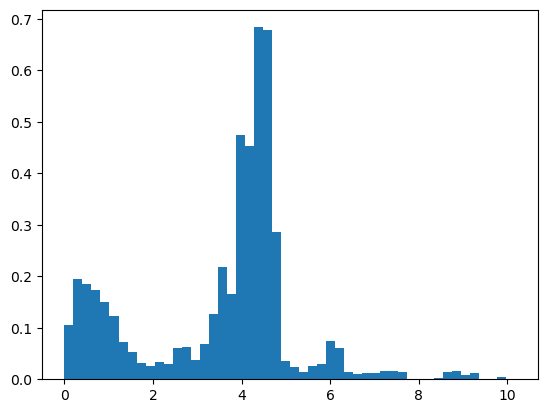

In [165]:
plt.hist(np.log(1+df["RESPONSE_TIME_HOURS"]), bins=50, density=True)

Text(0.5, 1.0, 'Due Time vs Response Time for 311 Service Requests')

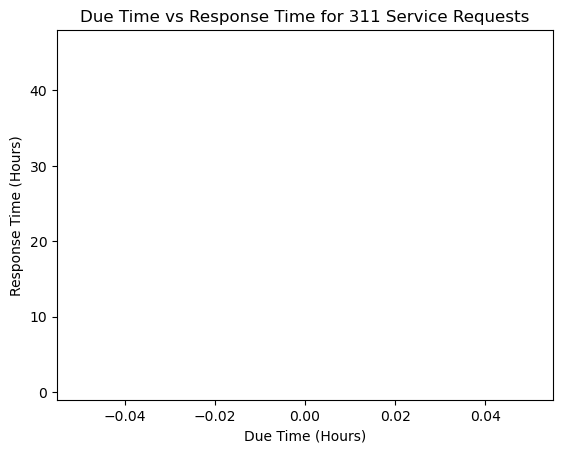

In [157]:
x_min, x_max = df["DUE_TIME_HOURS"].min(), df["DUE_TIME_HOURS"].max()
plt.scatter(df["DUE_TIME_HOURS"], df["RESPONSE_TIME_HOURS"], s=1.0, alpha=0.01)
# plt.plot(np.linspace(x_min, x_max, 100), np.linspace(x_min, x_max, 100), "r--")  # line y=x for reference
plt.ylim(-1, 48)  # restrict y-axis to 48 hours for better visualization
# plt.xlim(0, 24)  # restrict x-axis to 24 hours for better visualization
plt.xlabel("Due Time (Hours)")
plt.ylabel("Response Time (Hours)")
plt.title("Due Time vs Response Time for 311 Service Requests")


Text(0.5, 1.0, 'Due Time vs Response Time for Parking Enforcement Requests')

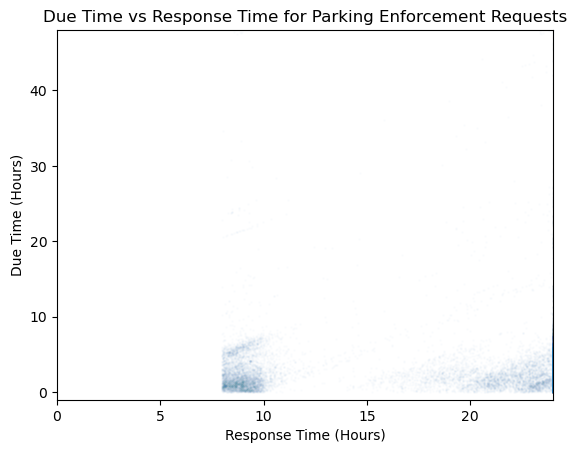

In [155]:
plt.scatter(df[df['SERVICECODEDESCRIPTION'] == "Parking Enforcement"]["DUE_TIME_HOURS"],
            df[df['SERVICECODEDESCRIPTION'] == "Parking Enforcement"]["RESPONSE_TIME_HOURS"], s=1.0, alpha=0.01)
plt.xlabel("Response Time (Hours)")
plt.ylabel("Due Time (Hours)")
plt.xlim(0, 24)  # restrict x-axis to 24 hours for better visualization
plt.ylim(-1, 48)  # restrict y-axis to 48 hours for better visualization
plt.title("Due Time vs Response Time for Parking Enforcement Requests")

In [135]:
# now filter by ward: plot histograms for actual response times for different wards 
df_ward = df.dropna(subset=["WARD"]).groupby("WARD", as_index=False)

Ward 3
Ward 2
Ward 8
Ward 6
Ward 1
Ward 5
Ward 4
Ward 7
Null


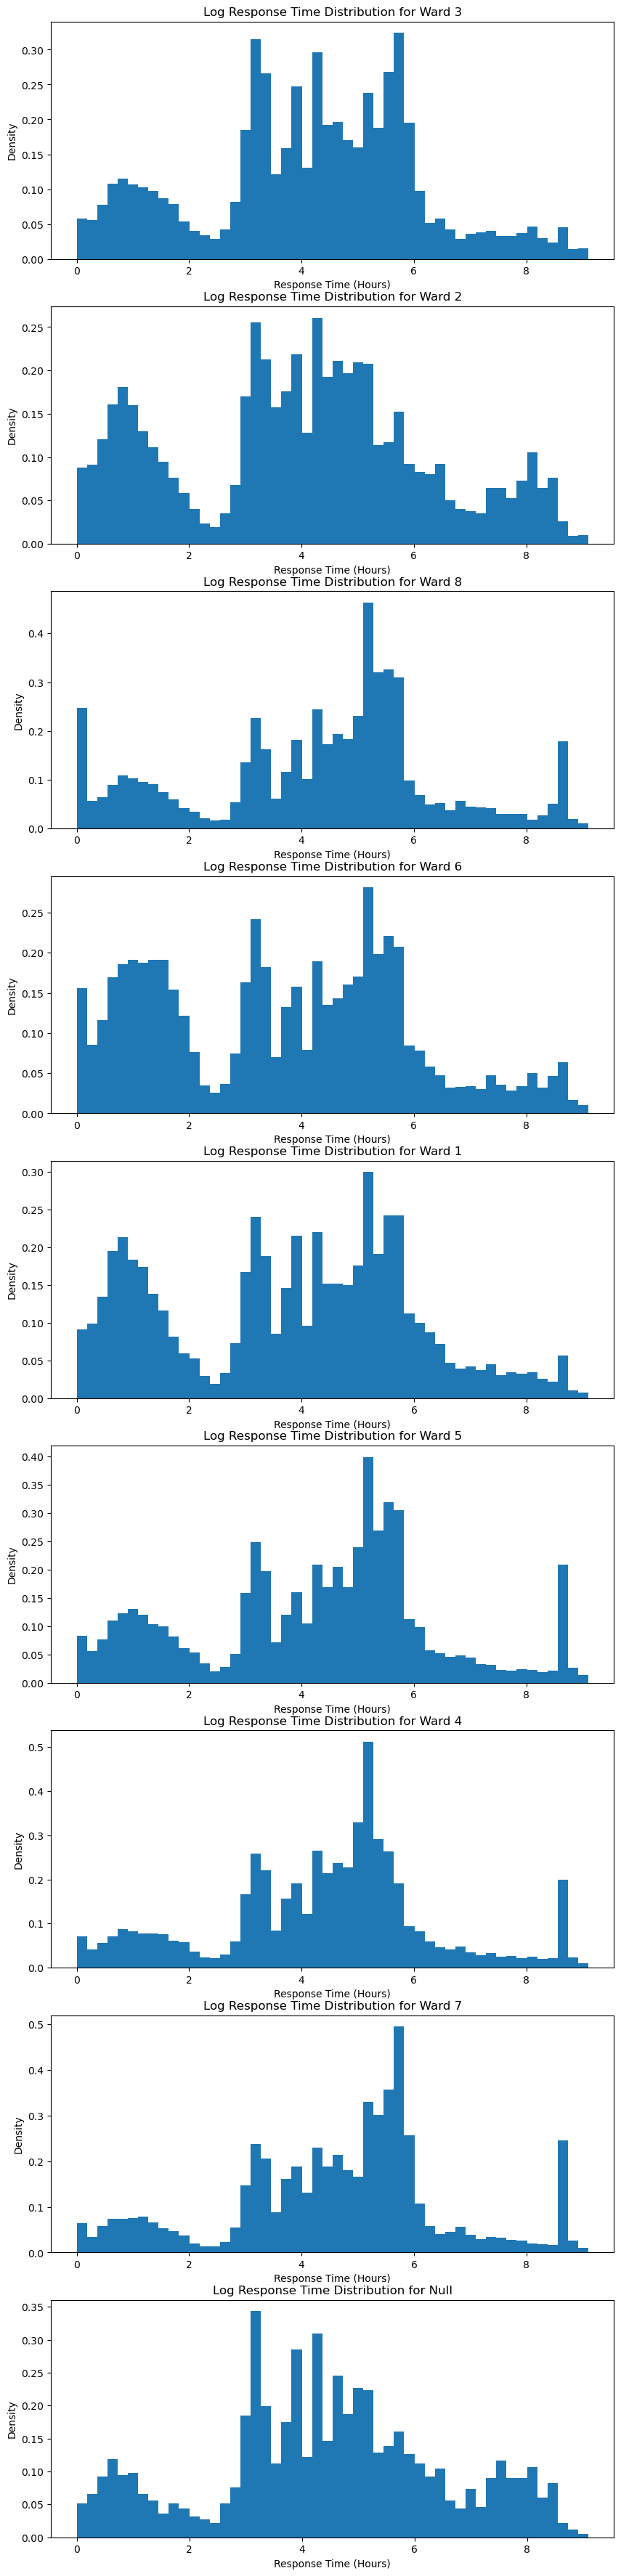

In [136]:
# plot histograms of response times for each ward
# get unique wards
wards = df.dropna(subset=["WARD"])["WARD"].unique()
fig, axs = plt.subplots(len(wards), 1, figsize=(10, 5 * len(wards)))
for i, ward in enumerate(wards):
    print(ward)
    axs[i].hist(np.log(df[df["WARD"] == ward]["RESPONSE_TIME_HOURS"] + 1), bins=50, density=True)
    axs[i].set_title(f"Log Response Time Distribution for {ward}")
    axs[i].set_xlabel("Response Time (Hours)")
    axs[i].set_ylabel("Density")

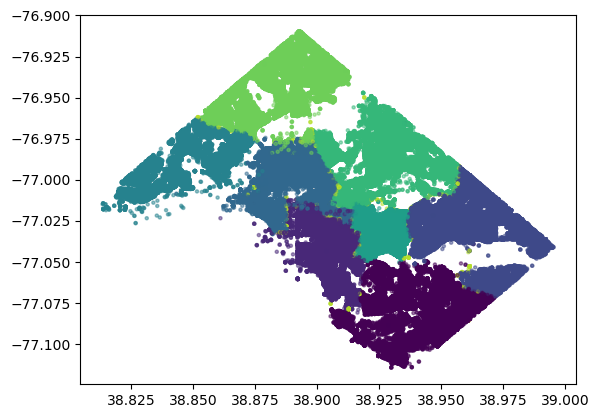

In [35]:
# convert wards to numerical data for plotting
ward_to_num = {ward: i for i, ward in enumerate(df.WARD.unique())}
df['WARD_NUM'] = df['WARD'].map(ward_to_num)

plt.scatter(df.LATITUDE, df.LONGITUDE, alpha=0.5, s=5, c=df.WARD_NUM)

In [ ]:
# classify the response times of ward 4
df_ward4 = df[df["WARD_NUM"] == 2]
df_ward4.head()

,X,Y,SERVICEREQUESTID,STREETADDRESS,CITY,STATE,ZIPCODE,WARD,SERVICECODE,SERVICECODEDESCRIPTION,...,LONGITUDE,MARADDRESSREPOSITORYID,GLOBALID,CREATED,EDITED,OBJECTID,SE_ANNO_CAD_DATA,DUE_TIME_HOURS,RESPONSE_TIME_HOURS,WARD_NUM
2,398316.79,141518.95,16-00485860,"4120 5TH STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,S0361,Sidewalk Repair,...,-77.019416,247564.0,{9A67F2AA-383B-22AA-E053-532F520A924B},NaN,NaN,7703258,NaN,3407.986389,18884.285000,2
19,396657.44,141871.65,16-00860584,"4419 17TH STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,S0476,Yard Waste - Missed,...,-77.038558,258661.0,{9A67F2AB-1954-22AA-E053-532F520A924B},NaN,NaN,7760883,NaN,121.153611,21.704444,2
31,397081.25,143283.21,16-00690000,"1401 LONGFELLOW STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,S0031,Bulk Collection,...,-77.033675,255962.0,{9A67F2AB-3C54-22AA-E053-532F520A924B},NaN,NaN,7769843,NaN,431.984722,194.646667,2
43,398909.81,143285.09,16-00457845,"124 LONGFELLOW STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,S0031,Bulk Collection,...,-77.012578,245861.0,{9A67F2AB-7C3D-22AA-E053-532F520A924B},NaN,NaN,7786204,NaN,479.984167,214.983056,2
46,394124.62,144143.61,16-00371070,"5601 BROAD BRANCH ROAD NW,WASHINGTON,DC,USA,20015",WASHINGTON,DC,20015.0,Ward 4,SIDEWLKEXP,Sidewalk Shoveling Enforcement Exemption,...,-77.067794,305897.0,{9A67F2AB-853E-22AA-E053-532F520A924B},NaN,NaN,7788509,NaN,119.988611,846.219167,2


In [45]:
# convert service codes to numerical data for plotting
service_to_num = {service: i for i, service in enumerate(df.SERVICECODE.unique())}
df['SERVICE_NUM'] = df['SERVICECODE'].map(service_to_num)

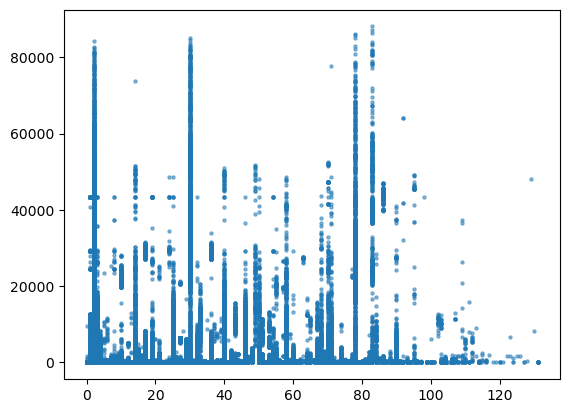

In [48]:
# plot histogram of response times for each service code 
plt.scatter(df.SERVICE_NUM, df.RESPONSE_TIME_HOURS, alpha=0.5, s=5)

/tmp/ipykernel_1580444/1178874910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ward4['ORG_NUM'] = df_ward4['ORGANIZATIONACRONYM'].map(org_to_num)


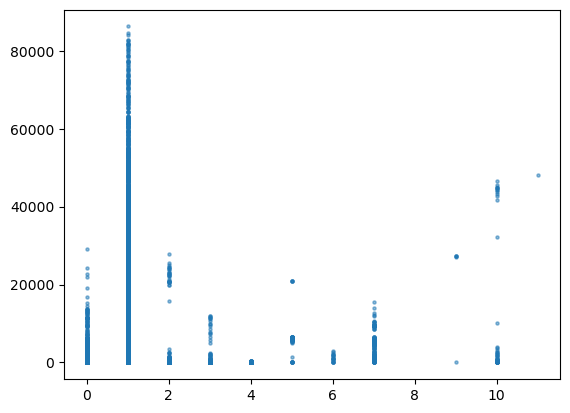

In [53]:
# let's see if organization acronym predicts response time
org_to_num = {org: i for i, org in enumerate(df.ORGANIZATIONACRONYM.unique())}
df_ward4['ORG_NUM'] = df_ward4['ORGANIZATIONACRONYM'].map(org_to_num)
plt.scatter(df_ward4.ORG_NUM, df_ward4.RESPONSE_TIME_HOURS, alpha=0.5, s=5)

In [ ]:
# convert add date to day of the year data
df_ward4['DAYOFYEAR'] = df.to_datetimedf.ADDDATE

Index(['X', 'Y', 'SERVICEREQUESTID', 'STREETADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'WARD', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'DETAILS', 'PRIORITY', 'XCOORD',
       'YCOORD', 'LATITUDE', 'LONGITUDE', 'MARADDRESSREPOSITORYID', 'GLOBALID',
       'CREATED', 'EDITED', 'OBJECTID', 'SE_ANNO_CAD_DATA', 'DUE_TIME_HOURS',
       'RESPONSE_TIME_HOURS', 'WARD_NUM', 'ORG_NUM'],
      dtype='object')

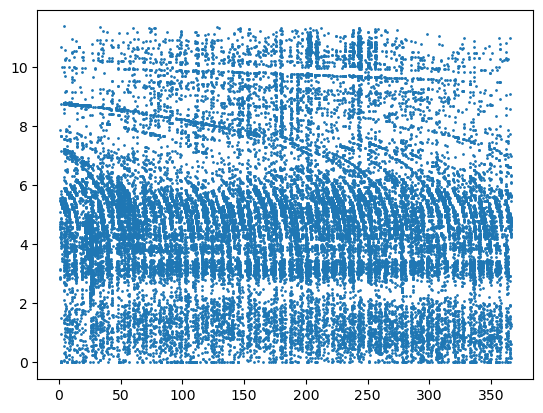

In [99]:
plt.scatter(df_ward4['ADDDATE_DAYOFYEAR'], np.log(1 + df_ward4['RESPONSE_TIME_HOURS']), s=1.0)

In [100]:
df_ward4['ADDDATE_DAYOFYEAR'] = pd.to_datetime(df_ward4['ADDDATE']).dt.dayofyear
df_ward4['ADDDATE_DAYOFWEEK'] = pd.to_datetime(df_ward4['ADDDATE']).dt.dayofweek

/tmp/ipykernel_1580444/3089816001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ward4['ADDDATE_DAYOFYEAR'] = pd.to_datetime(df_ward4['ADDDATE']).dt.dayofyear
/tmp/ipykernel_1580444/3089816001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ward4['ADDDATE_DAYOFWEEK'] = pd.to_datetime(df_ward4['ADDDATE']).dt.dayofweek


In [102]:
# df_ward4['SERVICE_NUM'] = df_ward4['SERVICECODE'].map(service_to_num)
day_of_week_means = df_ward4.groupby('ADDDATE_DAYOFWEEK')['RESPONSE_TIME_HOURS'].mean()
# plt.scatter(df_ward4['ADDDATE_DAYOFWEEK'], df_ward4.RESPONSE_TIME_HOURS, alpha=0.5, s=5)
# plt.ylim(0, 1000)

In [103]:
day_of_week_means

ADDDATE_DAYOFWEEK
0    2245.342112
1    2686.941867
2    2734.512475
3    2572.419174
4    2235.289324
5    2066.134850
6    1689.354075
Name: RESPONSE_TIME_HOURS, dtype: float64

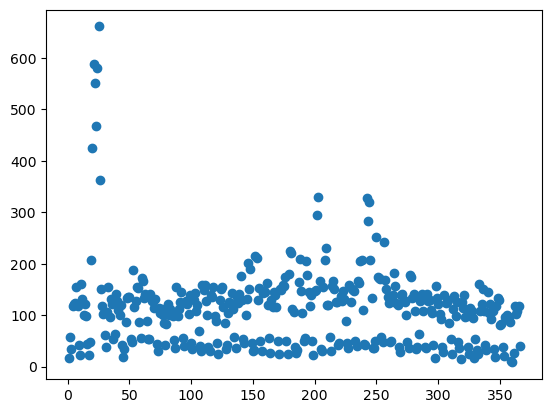

In [75]:
# compute how many requests are made on each day of the year
plt.scatter(df_ward4.ADDDATE_DAYOFYEAR.value_counts().index, df_ward4.ADDDATE_DAYOFYEAR.value_counts().values)

In [80]:
# what happened on day 25? 
df_ward4[df_ward4.ADDDATE_DAYOFYEAR == 25].SERVICE_NUM.value_counts()

34    327
44    166
27     53
12     40
28     33
66      9
5       8
19      3
7       3
8       2
4       2
15      2
36      1
24      1
95      1
9       1
83      1
42      1
14      1
51      1
23      1
41      1
18      1
29      1
6       1
Name: SERVICE_NUM, dtype: int64

In [89]:
df_ward4[df_ward4["ADDDATE_DAYOFYEAR"] == 25]

,X,Y,SERVICEREQUESTID,STREETADDRESS,CITY,STATE,ZIPCODE,WARD,SERVICECODE,SERVICECODEDESCRIPTION,...,EDITED,OBJECTID,SE_ANNO_CAD_DATA,DUE_TIME_HOURS,RESPONSE_TIME_HOURS,WARD_NUM,ORG_NUM,ADDDATE_DAYOFYEAR,ADDDATE_DAYOFWEEK,SERVICE_NUM
185,398949.98,142543.78,16-00380658,"5005 1ST STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,SRC02,Snow/Ice Removal,...,NaN,7832493,NaN,24.0,97.368889,2,0,25,0,34
188,397039.11,142688.67,16-00380661,"1415 GALLATIN STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,SRC02,Snow/Ice Removal,...,NaN,7832496,NaN,24.0,30.938889,2,0,25,0,34
190,398154.12,144327.96,16-00380665,"601 SOMERSET PLACE NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,SRC02,Snow/Ice Removal,...,NaN,7832498,NaN,24.0,30.911944,2,0,25,0,34
193,398362.41,143311.42,16-00380668,"417 LONGFELLOW STREET NW,WASHINGTON,DC,USA,20011",WASHINGTON,DC,20011.0,Ward 4,SRC02,Snow/Ice Removal,...,NaN,7832501,NaN,24.0,30.899444,2,0,25,0,34
194,397819.68,144065.38,16-00380670,"811 QUINTANA PLACE NW,WASHINGTON,DC,20011",WASHINGTON,DC,20011.0,Ward 4,SRC01,Snow/Ice Removal (Roadways AND Bridge walkways...,...,NaN,7832502,NaN,24.0,72.052500,2,0,25,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304026,397780.92,145299.34,16-00378662,7010 - 7099 BLOCK OF 9TH STREET NW,WASHINGTON,DC,20012.0,Ward 4,SRC01,Snow/Ice Removal (Roadways AND Bridge walkways...,...,NaN,11714955,NaN,24.0,76.537500,2,0,25,0,44
304030,397825.92,144310.80,16-00381326,"800 Block of Somerset PL, NW, WASHINGTON, DC,",WASHINGTON,DC,20011.0,Ward 4,SRC01,Snow/Ice Removal (Roadways AND Bridge walkways...,...,NaN,11714959,NaN,24.0,70.046389,2,0,25,0,44
304031,397085.47,142344.98,16-00380797,"1400 block of Delafield Pl. NW, WASHINGTON, DC,",WASHINGTON,DC,20011.0,Ward 4,SRC01,Snow/Ice Removal (Roadways AND Bridge walkways...,...,NaN,11714960,NaN,24.0,71.812500,2,0,25,0,44
304174,394575.90,144313.22,16-00378708,"3100 block Oliver St NW, WASHINGTON, DC,",WASHINGTON,DC,20015.0,Ward 4,SRC01,Snow/Ice Removal (Roadways AND Bridge walkways...,...,NaN,11715310,NaN,24.0,76.463333,2,0,25,0,44
